# Comparing Manhattan and Toronto Neighborhoods

Maria is trying to decide between two jobs. The jobs entail the same duties, but one is based in Toronto and the other is based in San Francisco.
<p>
Currently, Maria lives in Murray Hill in Manhattan. She frequently visits the surrounding areas for its rich culture and venues. During the week, Maria likes to visit local coffee shops and eat out at restaurants. She also goes to a fitness center daily. Maria typically uses the subway to get to work as well. Let's see if we can determine what neighborhood in Toronto or San Francisco would be best for her to relocate to so that she is more likely to remain with the corporate office in Toronto instead of moving back to Manhattan.</p>
<p>
We will gather the geographical coordinates of each neighborhood for Toronto, San Francisco, and Manhattan as well as the Foursquare data for venues in the neighborhoods of those cities. We will compare each of their ten most common venues (lineups) and attempt to find the neighborhood that most closely matches the lineup of Murray Hill and the preferences of our subject Maria.

In [1]:
#Load all necessary dataframe, graphing, and statistical packages to the notebook
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from geopy.geocoders import Nominatim
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
import folium

# Load Data

In [2]:
#Read in all CSV data files of each city from previous notebooks used to gather geographical coordinate and Foursquare data
toronto_csv = pd.read_csv('/Users/charaebradshaw/IBM Data Science Professional Certificate/Capstone/toronto.csv')
manhattan_csv = pd.read_csv('/Users/charaebradshaw/IBM Data Science Professional Certificate/Capstone/manhattan.csv')
sanfran_csv = pd.read_csv('/Users/charaebradshaw/IBM Data Science Professional Certificate/Capstone/sanfran.csv')

In [3]:
#Turn CSV files into pandas dataframes
toronto = pd.DataFrame(toronto_csv)
manhattan = pd.DataFrame(manhattan_csv)
sanfran = pd.DataFrame(sanfran_csv)

# Clean Data

<h3>Toronto</h3>

In [4]:
toronto.head()

,Unnamed: 0,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,M3A,North York,Parkwoods,43.753259,-79.329656,0.0,Park,Fast Food Restaurant,Food & Drink Shop,Distribution Center,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run
1,1,M4A,North York,Victoria Village,43.725882,-79.315572,1.0,Coffee Shop,Hockey Arena,Pizza Place,Portuguese Restaurant,Discount Store,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner
2,2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,1.0,Coffee Shop,Park,Bakery,Theater,Café,Pub,Breakfast Spot,Yoga Studio,Hotel,Spa
3,3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,1.0,Clothing Store,Furniture / Home Store,Athletics & Sports,Accessories Store,Vietnamese Restaurant,Coffee Shop,Boutique,Miscellaneous Shop,Carpet Store,Deli / Bodega
4,4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494,1.0,Coffee Shop,Sushi Restaurant,Yoga Studio,Bar,Beer Bar,Smoothie Shop,Sandwich Place,Salad Place,Burrito Place,Portuguese Restaurant


In [5]:
#Drop unneeded columns or extra columns
toronto.drop(['Unnamed: 0', 'Cluster Labels'], axis=1, inplace=True)
toronto.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M3A,North York,Parkwoods,43.753259,-79.329656,Park,Fast Food Restaurant,Food & Drink Shop,Distribution Center,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run
1,M4A,North York,Victoria Village,43.725882,-79.315572,Coffee Shop,Hockey Arena,Pizza Place,Portuguese Restaurant,Discount Store,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,Coffee Shop,Park,Bakery,Theater,Café,Pub,Breakfast Spot,Yoga Studio,Hotel,Spa
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,Clothing Store,Furniture / Home Store,Athletics & Sports,Accessories Store,Vietnamese Restaurant,Coffee Shop,Boutique,Miscellaneous Shop,Carpet Store,Deli / Bodega
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494,Coffee Shop,Sushi Restaurant,Yoga Studio,Bar,Beer Bar,Smoothie Shop,Sandwich Place,Salad Place,Burrito Place,Portuguese Restaurant


<h3>Manhattan</h3>

In [6]:
manhattan.head()

,Unnamed: 0,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,Manhattan,Marble Hill,40.876551,-73.910660,1,Coffee Shop,Sandwich Place,Gym,Yoga Studio,Tennis Stadium,Deli / Bodega,Pizza Place,Diner,Discount Store,Pharmacy
1,1,Manhattan,Chinatown,40.715618,-73.994279,0,Chinese Restaurant,Bakery,Cocktail Bar,American Restaurant,Salon / Barbershop,Dessert Shop,Spa,Hotpot Restaurant,Optical Shop,Mexican Restaurant
2,2,Manhattan,Washington Heights,40.851903,-73.936900,0,Café,Grocery Store,Bakery,Mobile Phone Shop,Pizza Place,Sandwich Place,Chinese Restaurant,Supermarket,Supplement Shop,Coffee Shop
3,3,Manhattan,Inwood,40.867684,-73.921210,0,Mexican Restaurant,Restaurant,Café,Deli / Bodega,Wine Bar,Pizza Place,Park,Bakery,Lounge,Chinese Restaurant
4,4,Manhattan,Hamilton Heights,40.823604,-73.949688,0,Pizza Place,Coffee Shop,Café,Mexican Restaurant,Deli / Bodega,Yoga Studio,Bakery,Latin American Restaurant,Liquor Store,Park


In [7]:
#Drop unneeded columns or extra columns
manhattan.drop(['Unnamed: 0', 'Cluster Labels'], axis=1, inplace=True)

<h3>San Francisco</h3>

In [8]:
sanfran.head()

,Unnamed: 0,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,Alamo Square,37.776360,-122.434700,0,Bar,Indian Restaurant,Food Truck,Café,Seafood Restaurant,Sushi Restaurant,Record Shop,Pizza Place,Ethiopian Restaurant,Bakery
1,1,Anza Vista,37.780836,-122.443149,0,Café,Coffee Shop,Bus Station,Sandwich Place,Tunnel,Health & Beauty Service,Arts & Crafts Store,Pet Store,Convenience Store,Cosmetics Shop
2,3,Balboa Hollow,37.798794,-122.436098,0,Cosmetics Shop,Gym / Fitness Center,Wine Bar,Italian Restaurant,French Restaurant,Mexican Restaurant,Ice Cream Shop,Salad Place,Deli / Bodega,Motel
3,4,Balboa Terrace,37.731300,-122.468700,0,Light Rail Station,Optical Shop,Intersection,Bakery,Comic Shop,Playground,Sushi Restaurant,Pharmacy,Restaurant,Gym
4,5,Bayview,37.728889,-122.392500,0,Bakery,Café,Southern / Soul Food Restaurant,Pharmacy,Pool,Chinese Restaurant,Coffee Shop,BBQ Joint,Piercing Parlor,Gym


In [9]:
#Drop unneeded columns or extra columns
sanfran.drop('Cluster Labels', axis=1, inplace=True)

# Data Compilation

Here we will compile all three cities into a single dataframe so that we can run the KMeans Clustering Analysis on all of them.

In [10]:
three_cities = pd.concat([toronto,manhattan,sanfran])
three_cities.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Unnamed: 0
0,M3A,North York,Parkwoods,43.753259,-79.329656,Park,Fast Food Restaurant,Food & Drink Shop,Distribution Center,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,NaN
1,M4A,North York,Victoria Village,43.725882,-79.315572,Coffee Shop,Hockey Arena,Pizza Place,Portuguese Restaurant,Discount Store,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,NaN
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,Coffee Shop,Park,Bakery,Theater,Café,Pub,Breakfast Spot,Yoga Studio,Hotel,Spa,NaN
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,Clothing Store,Furniture / Home Store,Athletics & Sports,Accessories Store,Vietnamese Restaurant,Coffee Shop,Boutique,Miscellaneous Shop,Carpet Store,Deli / Bodega,NaN
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494,Coffee Shop,Sushi Restaurant,Yoga Studio,Bar,Beer Bar,Smoothie Shop,Sandwich Place,Salad Place,Burrito Place,Portuguese Restaurant,NaN


In [11]:
#Drop unneeded columns
three_cities.drop(['Postal Code', 'Unnamed: 0', 'Borough'], axis=1, inplace=True)

In [12]:
three_cities.head()

,Neighborhood,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Parkwoods,43.753259,-79.329656,Park,Fast Food Restaurant,Food & Drink Shop,Distribution Center,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run
1,Victoria Village,43.725882,-79.315572,Coffee Shop,Hockey Arena,Pizza Place,Portuguese Restaurant,Discount Store,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner
2,"Regent Park, Harbourfront",43.654260,-79.360636,Coffee Shop,Park,Bakery,Theater,Café,Pub,Breakfast Spot,Yoga Studio,Hotel,Spa
3,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,Clothing Store,Furniture / Home Store,Athletics & Sports,Accessories Store,Vietnamese Restaurant,Coffee Shop,Boutique,Miscellaneous Shop,Carpet Store,Deli / Bodega
4,Ontario Provincial Government,43.662301,-79.389494,Coffee Shop,Sushi Restaurant,Yoga Studio,Bar,Beer Bar,Smoothie Shop,Sandwich Place,Salad Place,Burrito Place,Portuguese Restaurant


# Mapping the Cities

In [13]:
#We will map all three cities, but will center it at Toronto since it is somewhat in-between Manhattan and San Francisco
place = 'Toronto, Ontario, Canada'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(place)
latitude_toronto = location.latitude
longitude_toronto = location.longitude

In [14]:
# Create a map of Toronto using latitude and longitude values
city_map = folium.Map(location=[latitude_toronto, longitude_toronto], zoom_start=11)

# add markers to map
for lat, long, label in zip(three_cities['Latitude'], three_cities['Longitude'], three_cities['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, long],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color='#9932CC',
        fill_opacity=1.0,
        parse_html=False).add_to(city_map)

city_map

# Clustering Neighborhoods

<h2>Elbow Method</h2>

We will use the within-clusters sum of squares (WSS) to determine what the optimal K value might be.

In [15]:
#Function calculating WSS
def calculate_WSS(points, max_k):
  sse = []
  for k in range(1, max_k + 1):
    kmeans = KMeans(n_clusters = k).fit(points)
    sse.append(kmeans.inertia_)
  return sse

In [16]:
#Gather latitudes and longitudes together
n_lats = list(three_cities['Latitude'])
n_longs = list(three_cities['Longitude'])
points = np.zeros((len(n_lats), 2))
for j in range(len(n_lats)):
    points[j, 0] = n_lats[j]
    points[j, 1] = n_longs[j]

In [17]:
#Calculate WSS for the dataset for each K from K=0 to K=10
WSS = calculate_WSS(points, 10)
print(WSS)

[128235.53423294035, 1088.6719134543985, 1.4604574566932154, 1.1072465101405948, 0.7853661859633916, 0.644518176597518, 0.6506290769343229, 0.4892765879834958, 0.47374398430513054, 0.40502762232655753]


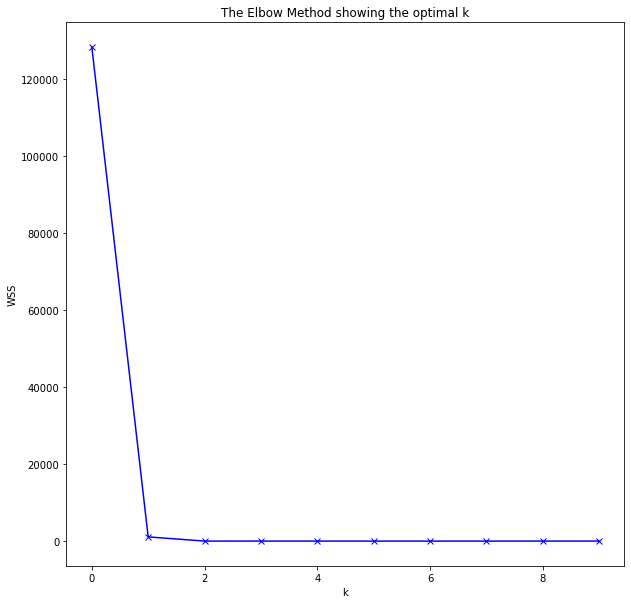

In [18]:
#Elbow Method Graph
K = range(0,10)
plt.figure(figsize=(10,10))
plt.plot(K, WSS, 'bx-')
plt.xlabel('k')
plt.ylabel('WSS')
plt.title('The Elbow Method showing the optimal k')
plt.show()

It appears that a single cluster would be the best. However, we need a minimum of two clusters (one with Murray Hill and one without) in order to make a decision as to what neighborhood would be best since we know that a decision MUST be made.

<h2>Silhouette Method</h2>

We will now confirm our optimal K by calculating the silhouette score.

In [19]:
#Calculating silhouette score for K=2 to K=10
sil_ = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_ = KMeans(n_clusters = k).fit(points)
    labels = kmeans_.labels_
    sil_.append(silhouette_score(points, labels, metric = 'euclidean'))

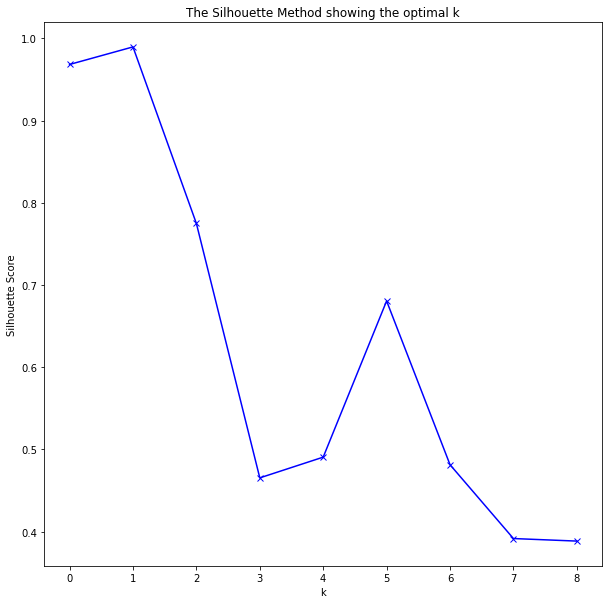

In [20]:
#Silhouette Method Graph
K = range(0,10)
plt.figure(figsize=(10,10))
plt.plot(sil_, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('The Silhouette Method showing the optimal k')
plt.show()

We need at least two clusters, because a single cluster will not help us narrow our choices of neighborhoods and the silhouette method requires at least two clusters. Since both our optimization methods point to one cluster, and we require at least two, we must take the next highest silhouette score, which would be at k=2 clusters.

<h2>KMeans Clustering</h2>

We need a minimum of two clusters to complete this project, even though the optimal K would be 1. Therefore, we will use 2 clusters for this clustering.

In [21]:
#Set number of clusters
k = 2

#Run k-means clustering
kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10)
kmeans.fit(points)

#Check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [22]:
#Add clustering labels to dataframe
three_cities.insert(0, 'Cluster Labels', kmeans.labels_)
three_cities.head()

,Cluster Labels,Neighborhood,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,Parkwoods,43.753259,-79.329656,Park,Fast Food Restaurant,Food & Drink Shop,Distribution Center,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run
1,1,Victoria Village,43.725882,-79.315572,Coffee Shop,Hockey Arena,Pizza Place,Portuguese Restaurant,Discount Store,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner
2,1,"Regent Park, Harbourfront",43.654260,-79.360636,Coffee Shop,Park,Bakery,Theater,Café,Pub,Breakfast Spot,Yoga Studio,Hotel,Spa
3,1,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,Clothing Store,Furniture / Home Store,Athletics & Sports,Accessories Store,Vietnamese Restaurant,Coffee Shop,Boutique,Miscellaneous Shop,Carpet Store,Deli / Bodega
4,1,Ontario Provincial Government,43.662301,-79.389494,Coffee Shop,Sushi Restaurant,Yoga Studio,Bar,Beer Bar,Smoothie Shop,Sandwich Place,Salad Place,Burrito Place,Portuguese Restaurant


# Examining Clusters

<h2>Cluster 0</h2>

In [23]:
three_cities.loc[(three_cities['Cluster Labels']==0)]

,Cluster Labels,Neighborhood,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,Alamo Square,37.776360,-122.434700,Bar,Indian Restaurant,Food Truck,Café,Seafood Restaurant,Sushi Restaurant,Record Shop,Pizza Place,Ethiopian Restaurant,Bakery
1,0,Anza Vista,37.780836,-122.443149,Café,Coffee Shop,Bus Station,Sandwich Place,Tunnel,Health & Beauty Service,Arts & Crafts Store,Pet Store,Convenience Store,Cosmetics Shop
2,0,Balboa Hollow,37.798794,-122.436098,Cosmetics Shop,Gym / Fitness Center,Wine Bar,Italian Restaurant,French Restaurant,Mexican Restaurant,Ice Cream Shop,Salad Place,Deli / Bodega,Motel
3,0,Balboa Terrace,37.731300,-122.468700,Light Rail Station,Optical Shop,Intersection,Bakery,Comic Shop,Playground,Sushi Restaurant,Pharmacy,Restaurant,Gym
4,0,Bayview,37.728889,-122.392500,Bakery,Café,Southern / Soul Food Restaurant,Pharmacy,Pool,Chinese Restaurant,Coffee Shop,BBQ Joint,Piercing Parlor,Gym
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,0,Vista del Mar,37.778900,-122.507600,Historic Site,Scenic Lookout,Tourist Information Center,Cantonese Restaurant,Beach,Trail,Pharmacy,American Restaurant,Park,Surf Spot
111,0,West Portal,37.741141,-122.465634,Wine Bar,Pizza Place,Italian Restaurant,Mexican Restaurant,Coffee Shop,Burger Joint,Yoga Studio,Movie Theater,Mediterranean Restaurant,Grocery Store
112,0,Western Addition,37.779559,-122.429810,Grocery Store,Liquor Store,Record Shop,Pizza Place,Theater,Park,Seafood Restaurant,French Restaurant,Historic Site,Sandwich Place
113,0,Westwood Highlands,37.733300,-122.456600,Yoga Studio,Trail,Cantonese Restaurant,Bus Line,Sushi Restaurant,Breakfast Spot,Japanese Restaurant,Food Court,Farmers Market,Fast Food Restaurant


In [24]:
cluster_0 = three_cities.loc[(three_cities['Cluster Labels']==0)]
cluster_0.loc[(cluster_0['Neighborhood']=='Murray Hill')]

,Cluster Labels,Neighborhood,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue


<h2>Cluster 1</h2>

In [25]:
three_cities.loc[(three_cities['Cluster Labels']==1)]

,Cluster Labels,Neighborhood,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,Parkwoods,43.753259,-79.329656,Park,Fast Food Restaurant,Food & Drink Shop,Distribution Center,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run
1,1,Victoria Village,43.725882,-79.315572,Coffee Shop,Hockey Arena,Pizza Place,Portuguese Restaurant,Discount Store,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner
2,1,"Regent Park, Harbourfront",43.654260,-79.360636,Coffee Shop,Park,Bakery,Theater,Café,Pub,Breakfast Spot,Yoga Studio,Hotel,Spa
3,1,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,Clothing Store,Furniture / Home Store,Athletics & Sports,Accessories Store,Vietnamese Restaurant,Coffee Shop,Boutique,Miscellaneous Shop,Carpet Store,Deli / Bodega
4,1,Ontario Provincial Government,43.662301,-79.389494,Coffee Shop,Sushi Restaurant,Yoga Studio,Bar,Beer Bar,Smoothie Shop,Sandwich Place,Salad Place,Burrito Place,Portuguese Restaurant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,1,Turtle Bay,40.752042,-73.967708,Italian Restaurant,Coffee Shop,Hotel,Sushi Restaurant,Steakhouse,Park,Wine Bar,Deli / Bodega,Seafood Restaurant,Japanese Restaurant
36,1,Tudor City,40.746917,-73.971219,Park,Mexican Restaurant,Café,Sushi Restaurant,Coffee Shop,Pizza Place,Greek Restaurant,Diner,Garden,Thai Restaurant
37,1,Stuyvesant Town,40.731000,-73.974052,Park,Bar,Coffee Shop,Cocktail Bar,Basketball Court,Boat or Ferry,Farmers Market,Gym / Fitness Center,Baseball Field,Fountain
38,1,Flatiron,40.739673,-73.990947,Italian Restaurant,New American Restaurant,American Restaurant,Japanese Restaurant,Coffee Shop,Mediterranean Restaurant,Mexican Restaurant,Furniture / Home Store,Sporting Goods Shop,Wine Shop


In [26]:
cluster_1 = three_cities.loc[(three_cities['Cluster Labels']==1)]
cluster_1.loc[(cluster_1['Neighborhood']=='Murray Hill')]

,Cluster Labels,Neighborhood,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
16,1,Murray Hill,40.748303,-73.978332,Coffee Shop,Sandwich Place,Japanese Restaurant,Hotel,American Restaurant,Bar,Burger Joint,Gym / Fitness Center,Sushi Restaurant,Taco Place


# Similar Neighborhoods

Let's review the cluster that Murray Hill is in.

In [27]:
pd.set_option('display.max_rows', 500)
cluster_0

,Cluster Labels,Neighborhood,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,Alamo Square,37.776360,-122.434700,Bar,Indian Restaurant,Food Truck,Café,Seafood Restaurant,Sushi Restaurant,Record Shop,Pizza Place,Ethiopian Restaurant,Bakery
1,0,Anza Vista,37.780836,-122.443149,Café,Coffee Shop,Bus Station,Sandwich Place,Tunnel,Health & Beauty Service,Arts & Crafts Store,Pet Store,Convenience Store,Cosmetics Shop
2,0,Balboa Hollow,37.798794,-122.436098,Cosmetics Shop,Gym / Fitness Center,Wine Bar,Italian Restaurant,French Restaurant,Mexican Restaurant,Ice Cream Shop,Salad Place,Deli / Bodega,Motel
3,0,Balboa Terrace,37.731300,-122.468700,Light Rail Station,Optical Shop,Intersection,Bakery,Comic Shop,Playground,Sushi Restaurant,Pharmacy,Restaurant,Gym
4,0,Bayview,37.728889,-122.392500,Bakery,Café,Southern / Soul Food Restaurant,Pharmacy,Pool,Chinese Restaurant,Coffee Shop,BBQ Joint,Piercing Parlor,Gym
5,0,Belden Place,37.791744,-122.403886,Coffee Shop,Boutique,Men's Store,Bubble Tea Shop,Hotel,Sandwich Place,Sushi Restaurant,Jewelry Store,Clothing Store,French Restaurant
6,0,Bernal Heights,37.742986,-122.415804,Coffee Shop,Italian Restaurant,Playground,Trail,Mexican Restaurant,Yoga Studio,Food Truck,Chinese Restaurant,Gourmet Shop,Grocery Store
7,0,Buena Vista,37.806532,-122.420649,Ice Cream Shop,Park,Chocolate Shop,Historic Site,Tour Provider,Gift Shop,Diner,Boat or Ferry,Gym / Fitness Center,Gym
8,0,Butchertown,37.743470,-122.384760,Coffee Shop,Garden Center,Sandwich Place,Building,Music Store,General Entertainment,Food Truck,Park,Chinese Restaurant,Thrift / Vintage Store
9,0,Castro,37.760856,-122.434957,Gay Bar,Coffee Shop,Thai Restaurant,New American Restaurant,Yoga Studio,Deli / Bodega,Mexican Restaurant,Mediterranean Restaurant,Arts & Crafts Store,Convenience Store


In [28]:
cluster_0.loc[(cluster_0['Neighborhood']=='Murray Hill')]

,Cluster Labels,Neighborhood,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue


In [29]:
MC_1 = cluster_0.loc[(cluster_0['1st Most Common Venue']=='Coffee Shop')]
MC_1.head()

,Cluster Labels,Neighborhood,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,0,Belden Place,37.791744,-122.403886,Coffee Shop,Boutique,Men's Store,Bubble Tea Shop,Hotel,Sandwich Place,Sushi Restaurant,Jewelry Store,Clothing Store,French Restaurant
6,0,Bernal Heights,37.742986,-122.415804,Coffee Shop,Italian Restaurant,Playground,Trail,Mexican Restaurant,Yoga Studio,Food Truck,Chinese Restaurant,Gourmet Shop,Grocery Store
8,0,Butchertown,37.743470,-122.384760,Coffee Shop,Garden Center,Sandwich Place,Building,Music Store,General Entertainment,Food Truck,Park,Chinese Restaurant,Thrift / Vintage Store
24,0,Duboce Triangle,37.767138,-122.432230,Coffee Shop,Gym,Grocery Store,Mexican Restaurant,Gay Bar,New American Restaurant,Sandwich Place,Cocktail Bar,Seafood Restaurant,Pet Store
25,0,Embarcadero,37.792855,-122.396899,Coffee Shop,Japanese Restaurant,Sandwich Place,Gym,Seafood Restaurant,Burger Joint,Gym / Fitness Center,Food Truck,Park,Cycle Studio


We have now sorted out all locations that have a Coffee Shop as the 1st Most Common Venue. Based on Maria's preferences, Japanese restaurants are important to her. There is only one neighborhood in this list that has a Gym in its Most Common Venue lineup, and that's Don Mills South, in Toronto. Don Mills South also has four different types of restaurants in its Most Common Venue Lineup. This will be the neighborhood that is best for Maria to move to and that is probably most like Murray Hill.